In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
train_df = pd.read_csv('Google_Stock_Price_Train.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1384 non-null   object 
 1   Open       1384 non-null   float64
 2   High       1384 non-null   float64
 3   Low        1384 non-null   float64
 4   Close      1384 non-null   float64
 5   Adj Close  1384 non-null   float64
 6   Volume     1384 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 75.8+ KB


In [34]:
test_df = pd.read_csv('Google_Stock_Price_Test.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


#### Choosing column 'open' for predicition

In [35]:
test_df

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [36]:
train = train_df.loc[:,["Open"]].values
train.shape

(1384, 1)

In [37]:
train1= train_df['Open']
train1.shape

(1384,)

In [38]:
train

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1121.339966],
       [1102.089966],
       [1120.      ]])

In [39]:
train_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
...,...,...,...,...,...,...,...
1379,2018-06-25,1143.599976,1143.910034,1112.780029,1124.810059,1124.810059,2157300
1380,2018-06-26,1128.000000,1133.209961,1116.659058,1118.459961,1118.459961,1563200
1381,2018-06-27,1121.339966,1131.836060,1103.619995,1103.979980,1103.979980,1293900
1382,2018-06-28,1102.089966,1122.310059,1096.010010,1114.219971,1114.219971,1072400


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [41]:
train_scaled = scaler.fit_transform(train)

In [42]:
train_scaled

array([[0.00886318],
       [0.01217185],
       [0.01482002],
       ...,
       [0.93232012],
       [0.909051  ],
       [0.93070039]])

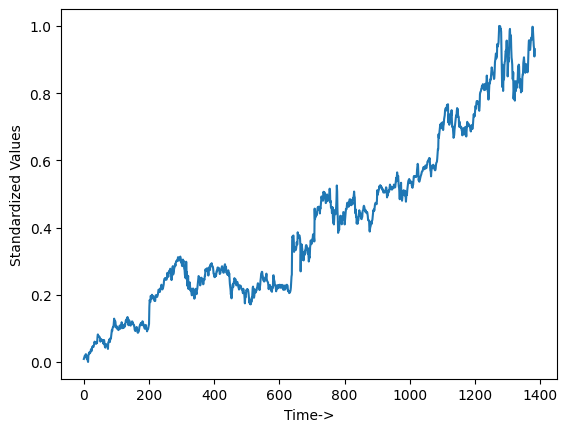

In [43]:
plt.plot(train_scaled)
plt.ylabel("Standardized Values")
plt.xlabel("Time->")
plt.show()

In [44]:
x_train = []
y_train = []
time = 60
for i in range(60,train_scaled.shape[0]):
    x_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)

In [45]:
x_train.shape,y_train.shape

((1324, 60), (1324,))

In [46]:
x_train = np.reshape(x_train,newshape=(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1324, 60, 1)

### Build model

In [47]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN,Dropout

In [48]:
model = Sequential()

model.add(SimpleRNN(units=50,activation = "tanh", return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50,activation = "tanh", return_sequences = True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50,activation = "tanh", return_sequences = True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 60, 50)            2600      
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 dropout_5 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 50)               

In [49]:
model.fit(x_train,y_train,epochs=100,batch_size=30,validation_split=0.05)

Epoch 1/100
42/42 [==============================] - 10s 92ms/step - loss: 0.2917 - val_loss: 0.0529
Epoch 2/100
42/42 [==============================] - 3s 72ms/step - loss: 0.2146 - val_loss: 0.0139
Epoch 3/100
42/42 [==============================] - 3s 72ms/step - loss: 0.1537 - val_loss: 0.0071
Epoch 4/100
42/42 [==============================] - 3s 72ms/step - loss: 0.1218 - val_loss: 0.0533
Epoch 5/100
42/42 [==============================] - 3s 73ms/step - loss: 0.0811 - val_loss: 0.0253
Epoch 6/100
42/42 [==============================] - 3s 73ms/step - loss: 0.0667 - val_loss: 0.0154
Epoch 7/100
42/42 [==============================] - 3s 73ms/step - loss: 0.0548 - val_loss: 0.0079
Epoch 8/100
42/42 [==============================] - 3s 73ms/step - loss: 0.0448 - val_loss: 0.0140
Epoch 9/100
42/42 [==============================] - 3s 73ms/step - loss: 0.0346 - val_loss: 0.0261
Epoch 10/100
42/42 [==============================] - 3s 73ms/step - loss: 0.0276 - val_loss: 0.004

### Prepare test dataset

In [50]:
data = pd.concat((train_df['Open'],test_df['Open']),axis=0)

In [51]:
data

0     357.385559
1     360.122742
2     362.313507
3     365.348755
4     365.393463
         ...    
15    829.620000
16    837.810000
17    834.710000
18    814.660000
19    796.860000
Name: Open, Length: 1404, dtype: float64

In [52]:
test_input = data.iloc[len(data) - len(test_df) - time : ].values
test_input.shape

(80,)

In [53]:
test_input

array([1020.      , 1016.799988, 1026.439941, 1027.98999 , 1025.040039,
       1040.880005, 1037.      , 1051.369995, 1077.430054, 1069.400024,
       1082.      , 1077.859985, 1052.      , 1025.52002 , 1029.51001 ,
       1046.      , 1030.01001 , 1013.659973, 1028.099976, 1019.      ,
       1016.900024, 1049.22998 , 1058.540039, 1058.099976, 1086.030029,
       1093.599976, 1100.      , 1090.      , 1077.310059, 1079.890015,
       1061.859985, 1074.060059, 1083.560059, 1065.130005, 1079.      ,
       1079.02002 , 1064.890015, 1063.030029, 1067.560059, 1099.349976,
       1122.329956, 1140.98999 , 1142.170044, 1131.319946, 1118.180054,
       1118.599976, 1131.069946, 1141.119995, 1143.849976, 1148.859985,
       1143.650024, 1158.5     , 1175.310059, 1174.849976, 1159.140015,
       1143.599976, 1128.      , 1121.339966, 1102.089966, 1120.      ,
        778.81    ,  788.36    ,  786.08    ,  795.26    ,  806.4     ,
        807.86    ,  805.      ,  807.14    ,  807.48    ,  807.

In [54]:
test_input = test_input.reshape(-1,1)
test_input.shape

(80, 1)

In [55]:
test_scaled = scaler.transform(test_input)

#### Create test data set

In [56]:
x_test = []
for i in range(time,test_scaled.shape[0]):
    x_test.append(test_scaled[i - time: i,0 ])
x_test = np.array(x_test)
x_test.shape

(20, 60)

In [57]:
x_test = np.reshape(x_test,newshape=(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(20, 60, 1)

In [58]:
y_test = test_df.loc[:,"Open"].values

### Model Prediction

In [59]:
y_pred = model.predict(x_test)

1/1 [==============================] - 1s 774ms/step


In [60]:
y_pred = scaler.inverse_transform(y_pred)

In [61]:
output = model.evaluate(x=x_test,y=y_test)

1/1 [==============================] - 0s 52ms/step - loss: 651317.1250


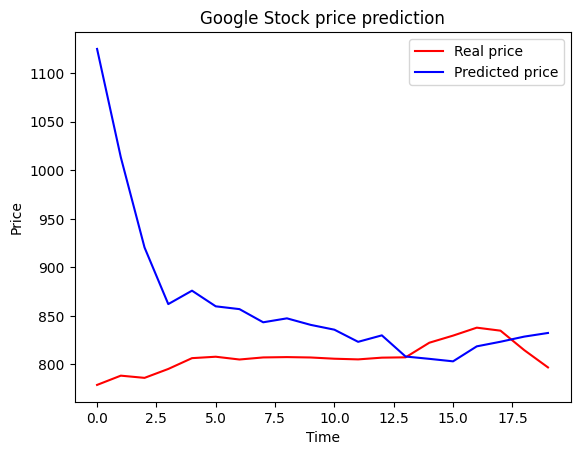

In [62]:
plt.plot(y_test, color = 'red', label = 'Real price')
plt.plot(y_pred, color = 'blue', label = 'Predicted price')

plt.title('Google Stock price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()